In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import yfinance as yf
from pandas_datareader import data as pdr

from sklearn.preprocessing import MinMaxScaler

yf.pdr_override()

[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close      Volume
Date                                                                     
1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000
1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000
1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000
1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000
1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000
Number of Days: 6701
Number of Days after dropping NaN: 6701


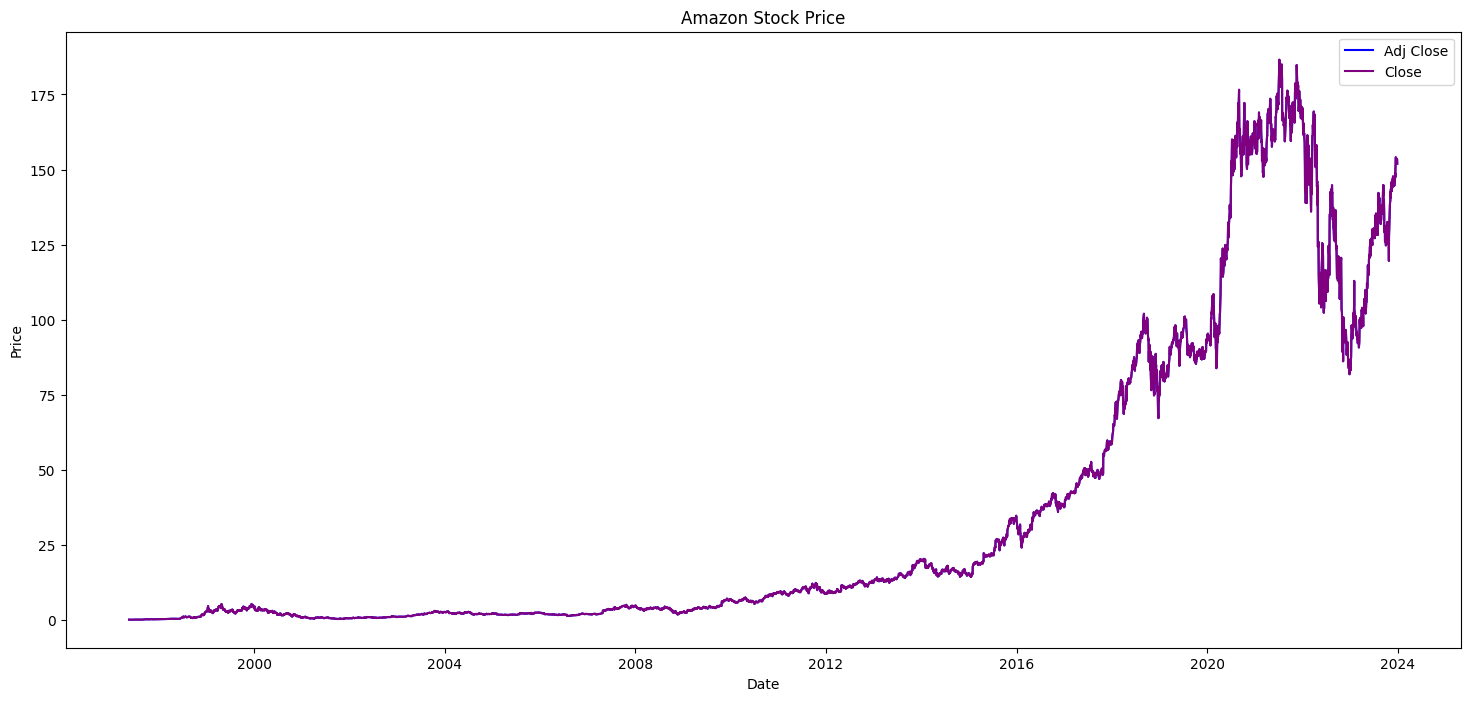

In [88]:
df = pdr.get_data_yahoo("AMZN")

print(df.head())
print("Number of Days: {}".format(len(df)))

# Cleaning the Data
df = df.dropna()
print("Number of Days after dropping NaN: {}".format(len(df)))

# Plotting the Data
plt.figure(figsize=(18,8))
plt.plot(df["Adj Close"], color="blue")
plt.plot(df["Close"], color="purple")
plt.title("Amazon Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(["Adj Close", "Close"])
plt.show()

In [89]:
print(df[['Adj Close', 'Close']])

# View instances where adj close and close are not equal
print(df[df['Adj Close'] != df['Close']])

df.drop(['Adj Close'], axis=1)

             Adj Close       Close
Date                              
1997-05-15    0.097917    0.097917
1997-05-16    0.086458    0.086458
1997-05-19    0.085417    0.085417
1997-05-20    0.081771    0.081771
1997-05-21    0.071354    0.071354
...                ...         ...
2023-12-22  153.419998  153.419998
2023-12-26  153.410004  153.410004
2023-12-27  153.339996  153.339996
2023-12-28  153.380005  153.380005
2023-12-29  151.940002  151.940002

[6701 rows x 2 columns]
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


,Open,High,Low,Close,Volume
Date,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,377064000
...,...,...,...,...,...
2023-12-22,153.770004,154.350006,152.710007,153.419998,29480100
2023-12-26,153.559998,153.979996,153.029999,153.410004,25067200
2023-12-27,153.559998,154.779999,153.119995,153.339996,31434700


In [90]:
data = df.filter(['Close'])
dataset = data.values

training_data_length = int(np.ceil(len(dataset)*.8))
testing_data_length = len(dataset) - training_data_length

print("Training Data Length: {}".format(training_data_length))
print("Testing Data Length: {}".format(testing_data_length))

# The data needs to be taken straight from the variable `data` to ensure that the dates are
# maintained for the plots to work well.

train_plot = data[0:training_data_length]
test_plot = data[training_data_length:]

print(len(dataset))

Training Data Length: 5361
Testing Data Length: 1340
6701


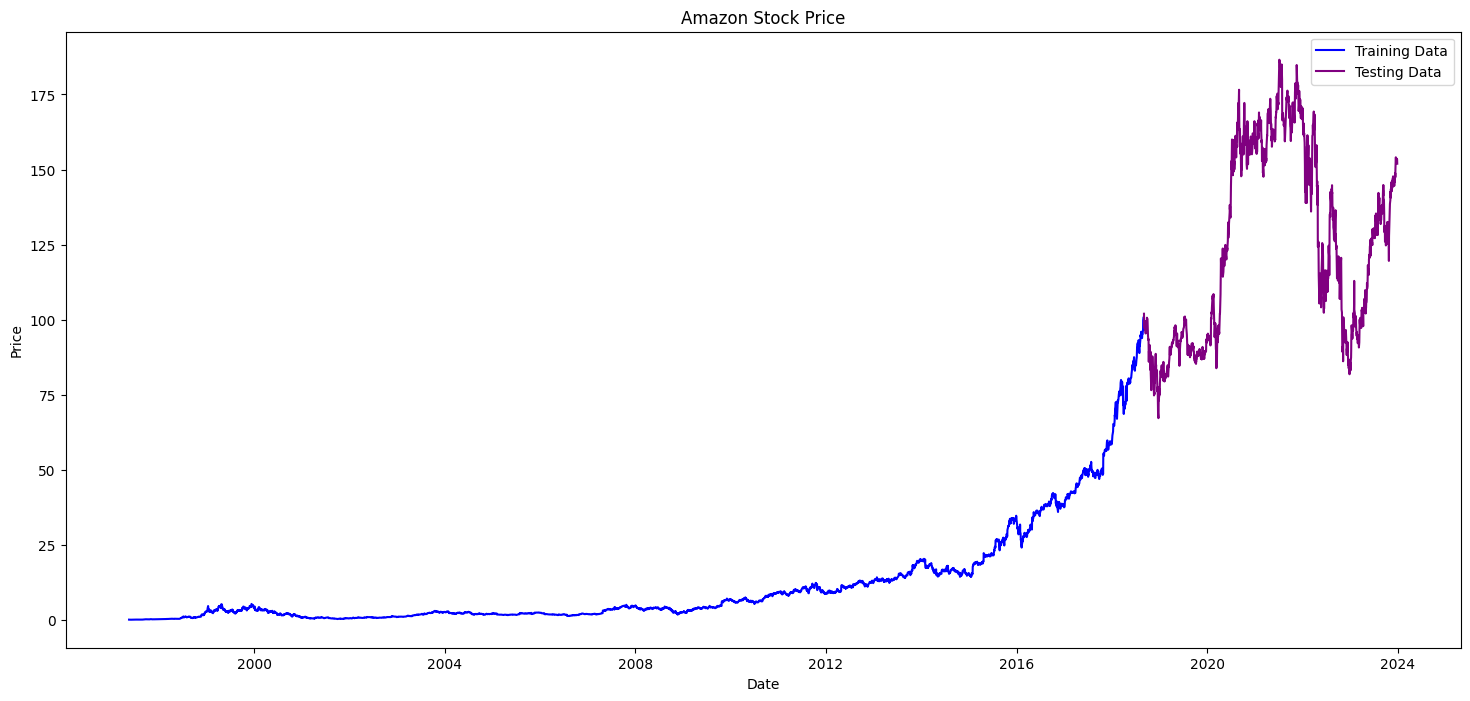

In [91]:
plt.figure(figsize=(18,8))
plt.plot(train_plot['Close'], color='blue')
plt.plot(test_plot['Close'], color='purple')
plt.title("Amazon Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(["Training Data", "Testing Data"])
plt.show()

In [92]:
dataset = data.values

scalar = MinMaxScaler(feature_range=(0,1))
scaled_dataset = scalar.fit_transform(dataset)

training_data = scaled_dataset[0:training_data_length, :]
testing_data = scaled_dataset[training_data_length:, :]

In [93]:
x_train = []
y_train = []

windowSize = 60

for i in range(windowSize, len(training_data)):
    x_train.append(training_data[i-windowSize:i, 0])
    y_train.append(training_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(5301, 60, 1)

In [94]:
model = keras.Sequential()
model.add(keras.layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(50, return_sequences=True))
model.add(keras.layers.LSTM(50, return_sequences=False))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

history = model.fit(x_train, y_train, batch_size=60, epochs=20)

Epoch 1/20
89/89 [==============================] - 10s 65ms/step - loss: 8.7232e-04 - mean_squared_error: 8.7232e-04 - mean_absolute_error: 0.0133
Epoch 2/20
89/89 [==============================] - 6s 66ms/step - loss: 2.7334e-05 - mean_squared_error: 2.7334e-05 - mean_absolute_error: 0.0030
Epoch 3/20
89/89 [==============================] - 5s 55ms/step - loss: 2.9341e-05 - mean_squared_error: 2.9341e-05 - mean_absolute_error: 0.0031
Epoch 4/20
89/89 [==============================] - 5s 57ms/step - loss: 2.7078e-05 - mean_squared_error: 2.7078e-05 - mean_absolute_error: 0.0029
Epoch 5/20
89/89 [==============================] - 5s 57ms/step - loss: 2.9561e-05 - mean_squared_error: 2.9561e-05 - mean_absolute_error: 0.0033
Epoch 6/20
89/89 [==============================] - 5s 58ms/step - loss: 3.2410e-05 - mean_squared_error: 3.2410e-05 - mean_absolute_error: 0.0035
Epoch 7/20
89/89 [==============================] - 5s 57ms/step - loss: 2.8482e-05 - mean_squared_error: 2.8482e-05 

       loss  mean_squared_error  mean_absolute_error
0  0.000872            0.000872             0.013278
1  0.000027            0.000027             0.002971
2  0.000029            0.000029             0.003109
3  0.000027            0.000027             0.002907
        loss  mean_squared_error  mean_absolute_error
15  0.000025            0.000025             0.003094
16  0.000031            0.000031             0.003663
17  0.000030            0.000030             0.003394
18  0.000023            0.000023             0.002889
19  0.000020            0.000020             0.002691


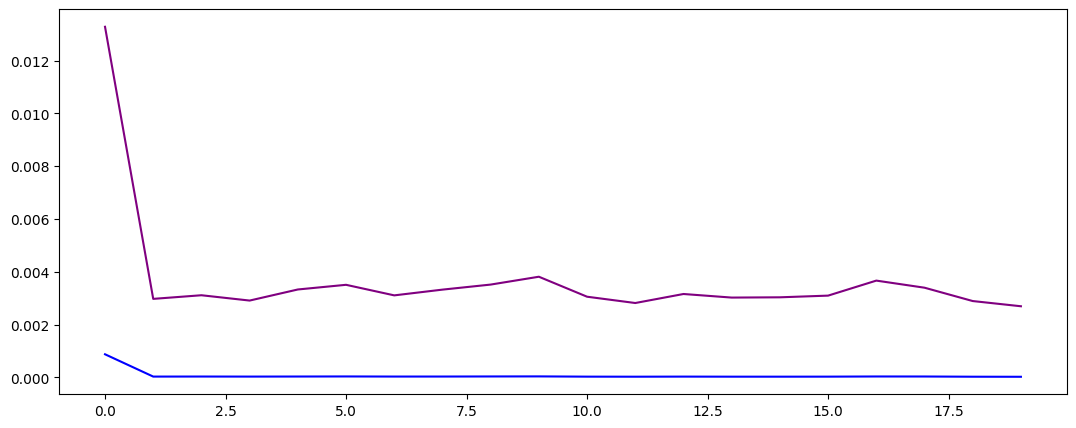

In [95]:
history_df = pd.DataFrame(history.history)

# Rows 0,1,2,3,8,9
print(history_df.iloc[0:4])
print(history_df.iloc[15:20])

plt.figure(figsize=(13,5))
plt.plot(history_df['loss'], color='blue')
plt.plot(history_df['mean_absolute_error'], color='purple')

In [96]:
test_data = scaled_dataset[training_data_length-60:,:]
x_test = []
y_test = dataset[training_data_length:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

print(x_test.shape)

predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

(1340, 60, 1)
42/42 [==============================] - 1s 16ms/step


6.016529756828221

In [97]:
valid = data[training_data_length:]
valid = pd.DataFrame(valid, columns=['Close'])
valid['Predictions'] = predictions[:,:]

valid.columns = ['True Price', 'Predictions']
valid

,True Price,Predictions
Date,,
2018-09-04,101.975502,99.722359
2018-09-05,99.740997,100.443695
2018-09-06,97.915497,101.156693
2018-09-07,97.603500,101.735321
2018-09-10,96.950500,102.129745
...,...,...
2023-12-22,153.419998,150.246429
2023-12-26,153.410004,151.005280
2023-12-27,153.339996,151.693924


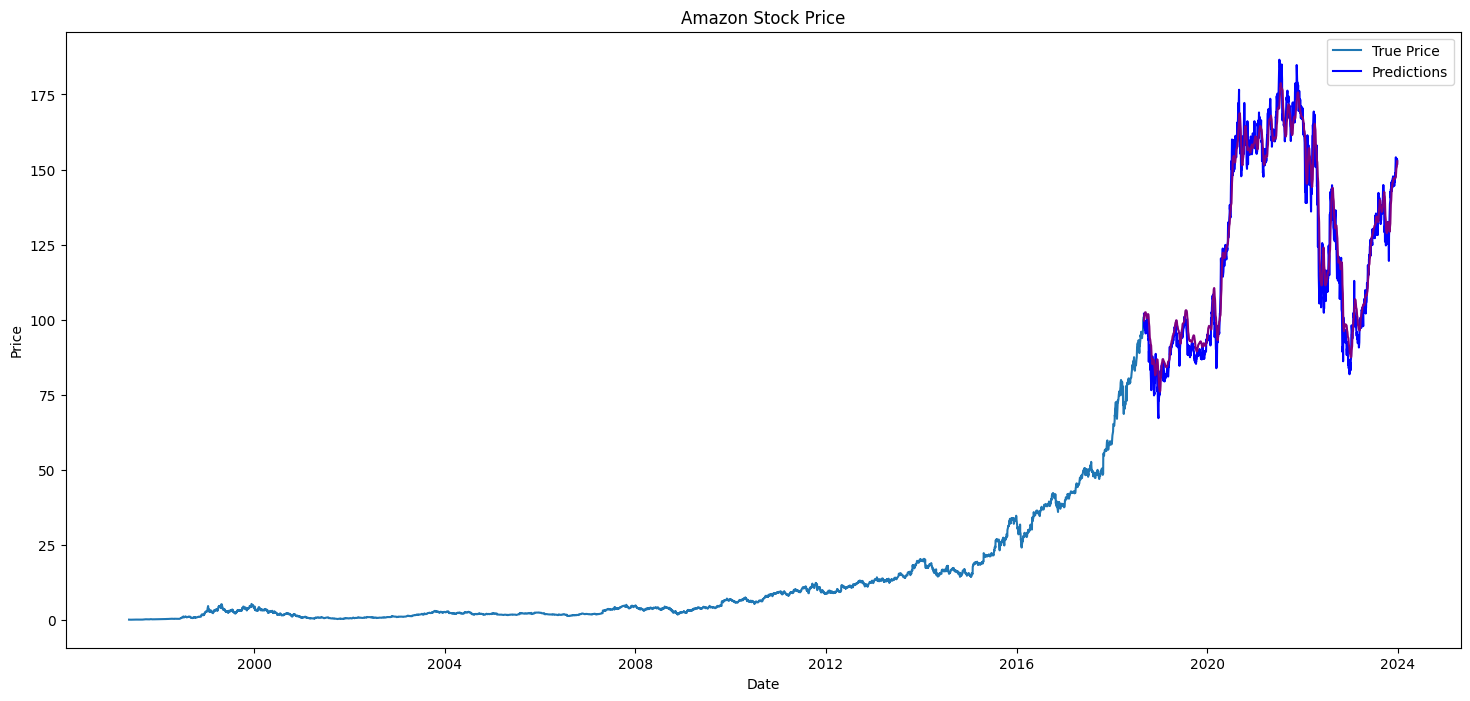

In [98]:
plt.figure(figsize=(18,8))
plt.plot(data[:training_data_length])
plt.plot(valid['True Price'], color='blue')
plt.plot(valid['Predictions'], color='purple')
plt.title("Amazon Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(["True Price", "Predictions"])
plt.show()

In [103]:
percentage_similarity = lambda close, pred: (min(close, pred)/max(close, pred)) *100

valid['Similarity'] = valid.apply(lambda row: percentage_similarity(row['True Price'], row['Predictions']), axis=1)
valid

,True Price,Predictions,Similarity
Date,,,
2018-09-04,101.975502,99.722359,97.790505
2018-09-05,99.740997,100.443695,99.300406
2018-09-06,97.915497,101.156693,96.795866
2018-09-07,97.603500,101.735321,95.938657
2018-09-10,96.950500,102.129745,94.928760
...,...,...,...
2023-12-22,153.419998,150.246429,97.931450
2023-12-26,153.410004,151.005280,98.432485
2023-12-27,153.339996,151.693924,98.926521


96.80383643266241


<Axes: xlabel='Date'>

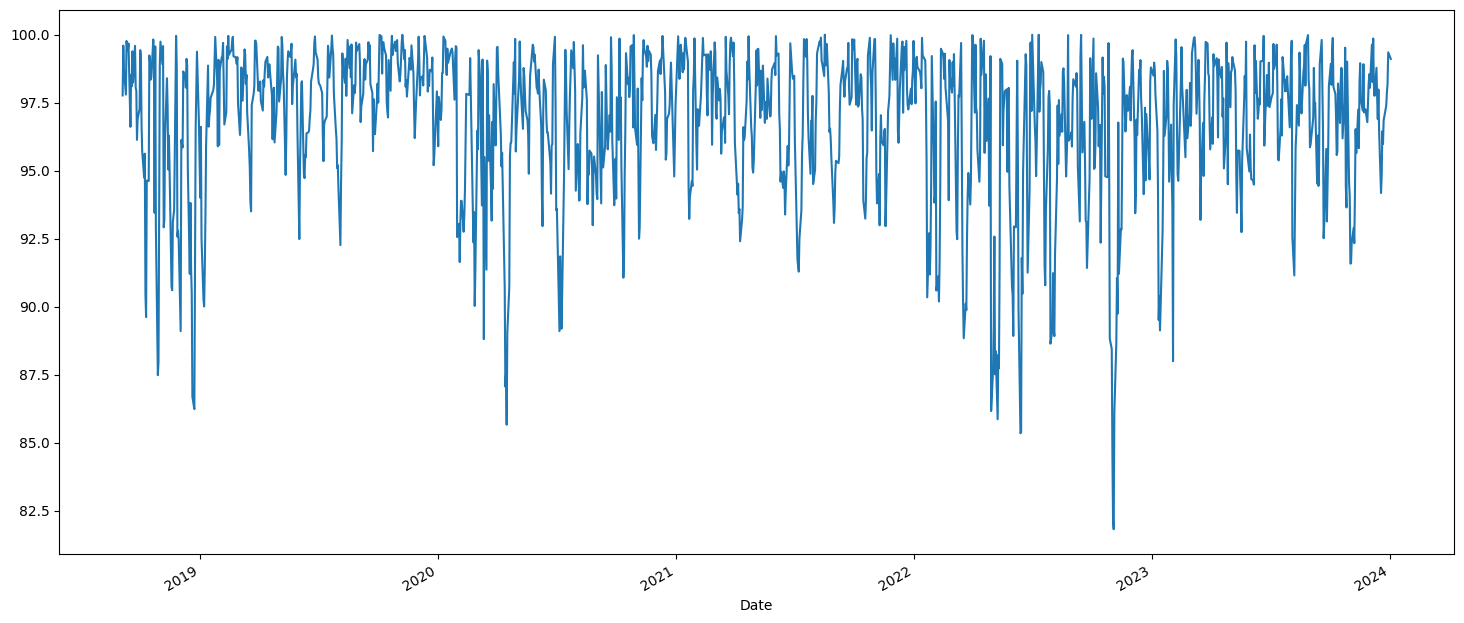

In [124]:
print(valid['Similarity'].mean())

valid['Similarity'].plot(figsize=(18,8))